In [1]:
import random
import numpy as np

In [2]:
start = 2023
my_list = [start]

for i in range(2, start):
    next_num = start - i
    if next_num < 0:
        break
    my_list.append(next_num)
    start = next_num
print(my_list)
print(len(my_list))


[2023, 2021, 2018, 2014, 2009, 2003, 1996, 1988, 1979, 1969, 1958, 1946, 1933, 1919, 1904, 1888, 1871, 1853, 1834, 1814, 1793, 1771, 1748, 1724, 1699, 1673, 1646, 1618, 1589, 1559, 1528, 1496, 1463, 1429, 1394, 1358, 1321, 1283, 1244, 1204, 1163, 1121, 1078, 1034, 989, 943, 896, 848, 799, 749, 698, 646, 593, 539, 484, 428, 371, 313, 254, 194, 133, 71, 8]
63


In [3]:
while len(my_list) > 1:
    # Calculate the difference between the first and last term
    difference = my_list[0] - my_list[-1]
    first=my_list[0]
    last=my_list[-1]
    #print("Difference:", difference)
    # Append the difference to the list
    my_list.append(difference)
    # Sort the list in descending order
    my_list.sort(reverse=True)
    # Discard the first and last terms
    my_list.remove(first)
    my_list.remove(last)
    #print("Updated List:", my_list)

print("Final List:", my_list)


Final List: [476]


In [6]:
def find_sum():
    total_sum = 0
    for n in range(63, 1011):
        term = 2 / ((2*n) * (2*n - 1))
        total_sum += term
    return total_sum

result_2 = find_sum()
print("The sum of the given sequence is:", result_2)


The sum of the given sequence is: 0.007537072008171691


Frequency of Final Numbers:
Final Number: 0 Frequency: 29
Final Number: 2 Frequency: 45
Final Number: 4 Frequency: 35
Final Number: 6 Frequency: 27
Final Number: 8 Frequency: 11
Final Number: 10 Frequency: 2


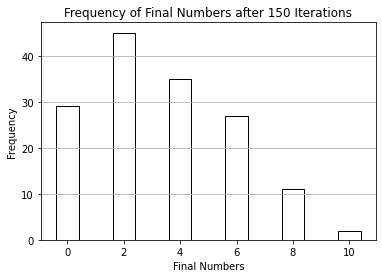

In [48]:
import random
import matplotlib.pyplot as plt 
from collections import defaultdict

final_numbers_frequency = defaultdict(int)

iterations=150

for j in range(1, iterations):
    hat = [i for i in range(1, 12)]

    while len(hat) > 1:
        # Pick 2 random numbers from the list
        random_numbers = random.sample(hat, 2)

        # Store them in separate variables
        num_1 = random_numbers[0]
        num_2 = random_numbers[1]

        if num_2 <= num_1:
            new = num_1 - num_2
        elif num_1 <= num_2:
            new = num_2 - num_1

        hat.append(new)
        hat.sort(reverse=True)
        hat.remove(num_1)
        hat.remove(num_2)

    final_number = hat[0]
    final_numbers_frequency[final_number] += 1

print("Frequency of Final Numbers:")
final_numbers_frequency_sorted = dict(sorted(final_numbers_frequency.items(), key=lambda item: item[0], reverse=False))
for number, frequency in final_numbers_frequency_sorted.items():
    print("Final Number:", number, "Frequency:", frequency)

#I want to plot the frequency plot for any chosen list and iterations to find any correlation   
plt.bar(final_numbers_frequency_sorted.keys(), final_numbers_frequency_sorted.values(), edgecolor='black', color='white')
plt.xlabel('Final Numbers')
#as the final numbers are all evenly spaced integers from 0, we can set this as the x labels 
plt.xticks(list(final_numbers_frequency_sorted.keys()))
plt.ylabel('Frequency')
plt.title('Frequency of Final Numbers after {} Iterations'.format(iterations)) 
plt.grid(axis='y')
plt.show()


Now if we want to plot multiple bars on one graph

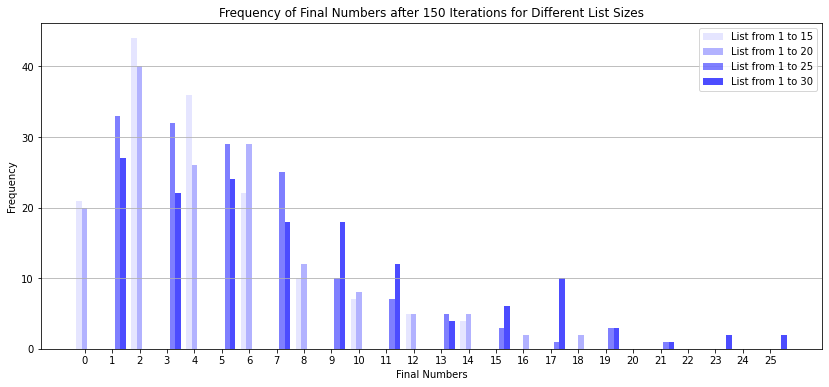

In [206]:
import random
import matplotlib.pyplot as plt 
from collections import defaultdict

def simulate(iterations, list_size):
    final_numbers_frequency = defaultdict(int)
    for j in range(1, iterations):
        hat = [i for i in range(1, list_size + 1)]
        while len(hat) > 1:
            random_numbers = random.sample(hat, 2)
            num_1 = random_numbers[0]
            num_2 = random_numbers[1]
            if num_2 <= num_1:
                new = num_1 - num_2
            elif num_1 <= num_2:
                new = num_2 - num_1
            hat.append(new)
            hat.sort(reverse=True)
            hat.remove(num_1)
            hat.remove(num_2)
        final_number = hat[0]
        final_numbers_frequency[final_number] += 1
    return final_numbers_frequency

# Number of iterations for each simulation
iterations = 150
# List sizes to simulate
list_sizes = [15,20,25,30]  # You can add more sizes as needed

# Dictionary to store final numbers frequencies for each list size
all_final_numbers_frequencies = {}

# Run simulations for each list size
for list_size in list_sizes:
    final_numbers_frequency = simulate(iterations, list_size)
    all_final_numbers_frequencies[list_size] = final_numbers_frequency

# Initialize an empty list to store all the keys
all_keys = []

# Iterate over each dictionary in all_final_numbers_frequencies
for final_numbers_frequency in all_final_numbers_frequencies.values():
    # Retrieve the keys from the current dictionary and append them to all_keys
    all_keys.extend(final_numbers_frequency.keys())

# Initialize a defaultdict to store the frequency of each key
key_frequency = defaultdict(int)

# Count the frequency of each key in the list of all keys
for key in all_keys:
    key_frequency[key] += 1

# Sort key_frequency by the ascending value of the keys
sorted_key_frequency = dict(sorted(key_frequency.items(), key=lambda item: item[0]))

# Plotting
plt.figure(figsize=(14, 6))
alpha_values = [0.1, 0.3, 0.5, 0.7]
bar_width = 0.2
for i, (list_size, final_numbers_frequency) in enumerate(all_final_numbers_frequencies.items()):
    final_numbers_frequency_sorted = dict(sorted(final_numbers_frequency.items()))
    #Checks how many bars will be associated with each x-axis value to ensure they are centred properly
    x_values = [x - (0.2 * (sorted_key_frequency[x] / 2)) + 0.2 * i for x in final_numbers_frequency_sorted.keys()]
    plt.bar(x_values, final_numbers_frequency_sorted.values(), width=bar_width, alpha=alpha_values[i], color='blue', label=f'List from 1 to {list_size}')

plt.xlabel('Final Numbers')
plt.ylabel('Frequency')
plt.title('Frequency of Final Numbers after {} Iterations for Different List Sizes'.format(iterations)) 
plt.xticks(range(max(all_keys) + 1))
plt.legend()
plt.grid(axis='y')
plt.show()
